In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [15]:
plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.facecolor'] = "w"


In [16]:
# get the name of all opsim dbs 
import os
import glob

workpath = os.getcwd()
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases
os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns/timeGaps'
os.chdir(workpath) # change back to work directory
dblist_all.sort()


In [17]:
def scale(arr, mode=0):
    """scale array by max"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]



In [18]:
# get the name of all opsim dbs 
import os
import glob

workpath = os.getcwd()

# load opsim database
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns/timeGaps/'
os.chdir(workpath) # change back to work directory
dblist_all.sort()



In [19]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_samefilt_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_d

In [20]:
def plot_barh(df_new, colon, byfamily=True, savefig=None, figsize=(8, 30), facecolor="#f1f1f3", **kwargs):
    """barh plot of FoM"""

    df_ = df_new.copy()
    df_['total'] = np.sum(df_[ colon ], axis=1)
    
    # get the max FOM of each family and sort by this
    df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
    df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)
    
    df_ = df_.set_index('db')
    if byfamily:
        df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])
    else:
        # sort by total only
        df_ = df_.sort_values(by='total', ascending=True)
    
    df_[colon] = df_[colon]/len(colon)
    ax = df_[ colon ].plot.barh(stacked=True, figsize=figsize, **kwargs)
    
    # get positions of hlines
    if byfamily:
        hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
        hlines = [hlines, hlines]
        ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5)
    
    plt.xlabel('normalized score', fontsize=20)
    plt.ylabel('')
    plt.legend(loc='lower right', frameon=True)
    plt.xlim([0,1.01])
    
    #ax = plt.gca()
    ax.set_facecolor(facecolor)
    
    if savefig!=None:
        plt.savefig(savefig, bbox_inches='tight')


def get_mycmap(pairs='diff'):
    """discrete colormap for filter pairs"""
    import numpy as np
    import matplotlib.colors as mcolors
    
    # colors in total
    # combine them and build a new colormap

    thecbases = [plt.cm.Blues,
                 plt.cm.Greens,
                 plt.cm.Purples,
                 plt.cm.Reds,
                 plt.cm.YlOrBr,
                 (240./255,230./255,140./255, 1.),
                ]

    grad = [thecbases[i](np.linspace(0, 1, 8-i)[::-1][1:]) for i in range(5)]
    
    #thecmaps = {'diff': , [thecbases[i](np.linspace(0, 1, 8-i)[::-1][1:]) for i in range(5)]
    #                'same':[thecbases[i](np.linspace(0, 1, 7-i)[-3 if i < 2 else -2]) 
    #                     for i in range(5)] + [thecbases[5]]}
    
    thecmaps = {'diff': [ grad[i] [ 1:6 - i ] for i in range(5) ] ,
                'same':[ grad[i] [ 1 if i!=5 else 0 ] for i in range(5) ] + [thecbases[5]]}
    
    colors = np.vstack( [c for c in thecmaps[pairs]] )
    mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
            
    #plt.pcolor(data, cmap=mymap)
    #plt.colorbar()
    #plt.show()
    return mymap



In [21]:
def get_df_norm( fomcsv = 'df_tgapsFoM_GP.csv'):
    """return normalized dataframe"""

    df_fom = pd.read_csv(fomcsv)
    
    if 'db' not in df_fom.columns:
        df_fom['db'] = dblist_all
        
    # scale fom table to 0 and 1
    df_new = df_fom[ ['db'] ].copy()
    for col in cols_all:
        # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
        df_new[col] = scale(df_fom[col]) 
        
    df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs.db", "") )
    df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.5_10yrs.db", "") )
    
    df_new['family'] = df_new.apply(get_family, axis=1)
    
    return df_new

In [22]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']



In [13]:
fomcsv = './df_tgapsFoM_GP_inwfd.csv'

pd.read_csv(fomcsv)

db          gi        gz        gy  \
0                        agnddf_v1.5_10yrs.db   64.283323  4.249306  0.017103   
1                      alt_dust_v1.5_10yrs.db    9.190168  0.002611  0.001006   
2   alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db    7.137389  0.006588  0.000784   
3               baseline_2snaps_v1.5_10yrs.db   52.578867  0.467459  0.011763   
4             baseline_samefilt_v1.5_10yrs.db   29.132817  0.026217  0.003523   
5                      baseline_v1.5_10yrs.db  217.933204  2.102842  0.003482   
6                     bulges_bs_v1.5_10yrs.db   20.811618  0.046438  0.007189   
7              bulges_bulge_wfd_v1.5_10yrs.db   10.412315  0.037147  0.001609   
8             bulges_cadence_bs_v1.5_10yrs.db   13.269530  0.005283  0.009060   
9      bulges_cadence_bulge_wfd_v1.5_10yrs.db   21.194475  0.023219  0.008818   
10       bulges_cadence_i_heavy_v1.5_10yrs.db   26.329020  0.046055  0.059431   
11               bulges_i_heavy_v1.5_10yrs.db    9.376797  0.006989  0.017993   
12                    daily_ddf_v1.5_10yrs.db   90.234129  1.021779  0.015192   
13                 dcr_nham1_ug_v1.5_10yrs.db  292.592089  2.897815  0.004558   
14                dcr_nham1_ugr_v1.5_10yrs.db   73.036266  0.280352  0.002769   
15               dcr_nham1_ugri_v1.5_10yrs.db  171.187397  0.416509  0.004633   
16                 dcr_nham2_ug_v1.5_10yrs.db   92.758886  1.541805  0.012010   
17                dcr_nham2_ugr_v1.5_10yrs.db  130.865386  0.051904  0.000619   
18               dcr_nham2_ugri_v1.5_10yrs.db  117.668092  0.226129  0.017594   
19                      descddf_v1.5_10yrs.db   93.824633  0.214714  0.009265   
20             filterdist_indx1_v1.5_10yrs.db   95.269821  0.401553  0.003256   
21             filterdist_indx2_v1.5_10yrs.db  210.364554  2.216995  0.002648   
22             filterdist_indx3_v1.5_10yrs.db  750.170805  3.865895  0.004297   
23             filterdist_indx4_v1.5_10yrs.db   55.270676  0.038398  0.000619   
24             filterdist_indx5_v1.5_10yrs.db  165.733176  0.073681  0.017491   
25             filterdist_indx6_v1.5_10yrs.db   52.426874  0.014548       NaN   
26             filterdist_indx7_v1.5_10yrs.db   69.305918  0.212664  0.016863   
27             filterdist_indx8_v1.5_10yrs.db  288.190650  0.209677  0.001254   
28      footprint_add_mag_cloudsv1.5_10yrs.db  107.759993  1.427749  0.015090   
29        footprint_big_sky_dustv1.5_10yrs.db    5.962684  0.004316  0.001006   
..                                        ...         ...       ...       ...   
56          short_exp_5ns_5expt_v1.5_10yrs.db  346.748780  1.324985  0.001438   
57                      spiders_v1.5_10yrs.db  106.969475  0.264489  0.029197   
58               third_obs_pt120v1.5_10yrs.db  225.702965  0.009452       NaN   
59                third_obs_pt15v1.5_10yrs.db  217.933204  2.102842  0.003482   
60                third_obs_pt30v1.5_10yrs.db  104.943667  0.194148  0.942434   
61                third_obs_pt45v1.5_10yrs.db  166.852511  0.085082  0.025155   
62                third_obs_pt60v1.5_10yrs.db  149.061712  0.032582  0.002648   
63                third_obs_pt90v1.5_10yrs.db  127.375980  0.022893  0.001272   
64            twilight_neo_mod1_v1.5_10yrs.db  532.201094  1.867584  0.239493   
65            twilight_neo_mod2_v1.5_10yrs.db   89.745293  4.219826  0.052693   
66            twilight_neo_mod3_v1.5_10yrs.db  187.993341  0.245490  0.011666   
67            twilight_neo_mod4_v1.5_10yrs.db  128.068922  0.063042  0.005970   
68                          u60_v1.5_10yrs.db  246.349750  2.206921  0.070503   
69                     var_expt_v1.5_10yrs.db  514.006677  0.555741  0.009072   
70    wfd_depth_scale0.65_noddf_v1.5_10yrs.db   89.617542  0.024486       NaN   
71          wfd_depth_scale0.65_v1.5_10yrs.db   30.479583  0.141529  0.004118   
72    wfd_depth_scale0.70_noddf_v1.5_10yrs.db   45.400897  0.041400  0.033645   
73          wfd_depth_scale0.70_v1.5_10yrs.db  140.365119  0.060698  0.007

### time gaps galactic plane

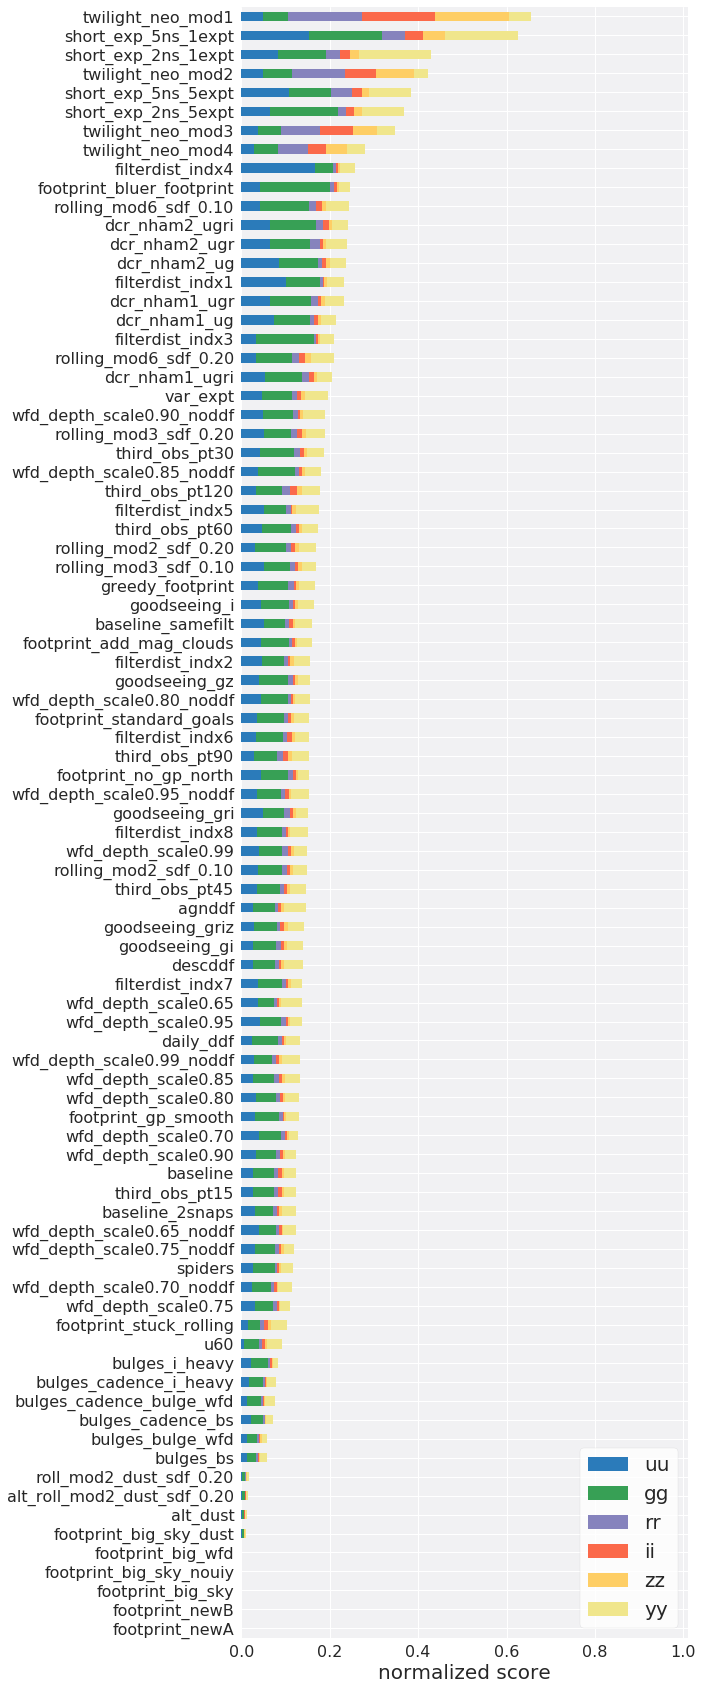

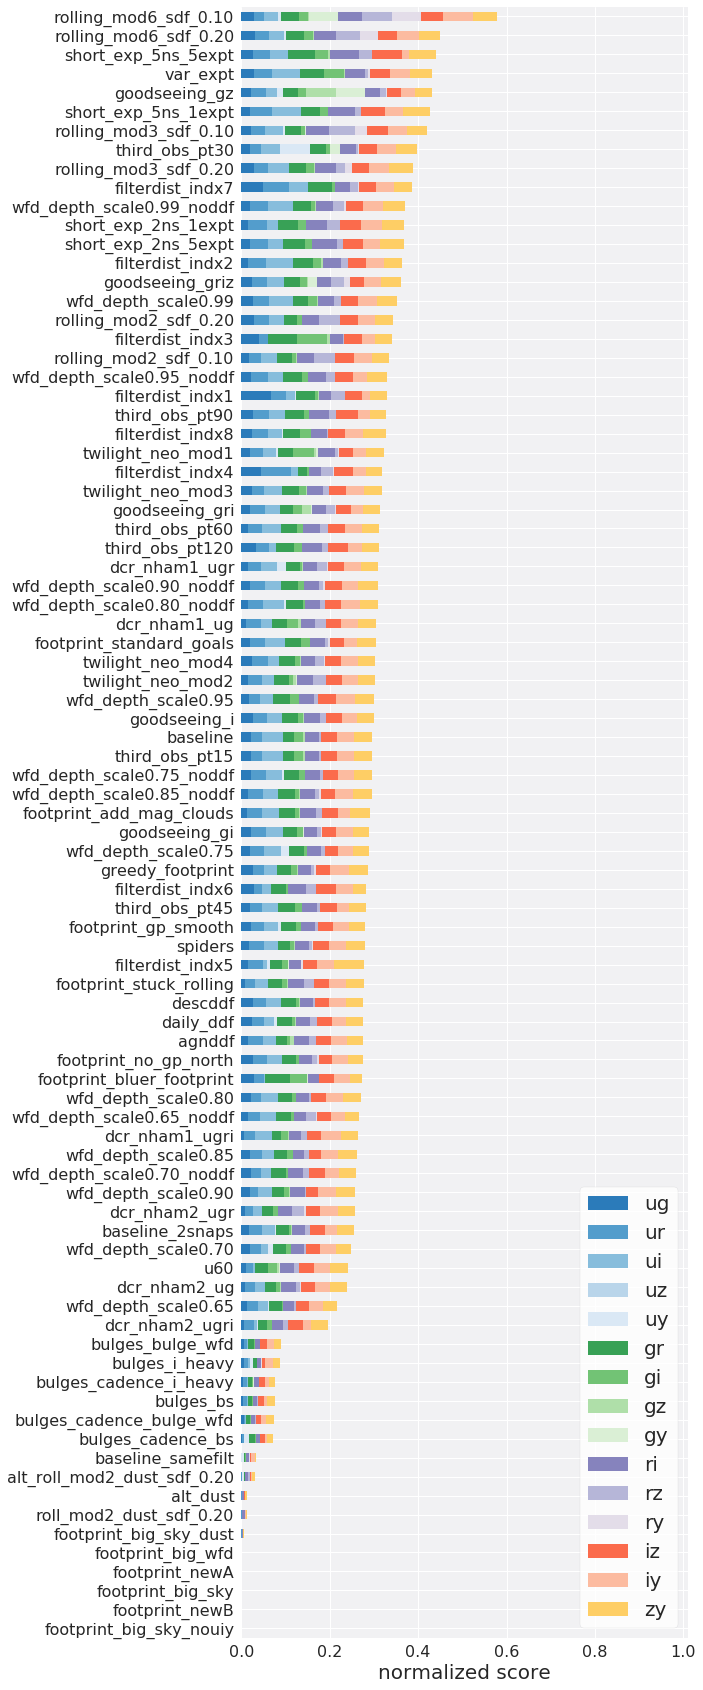

In [23]:
fomcsv = './data/df_tgapsFoM_GP_inwfd.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False, savefig='figures/barh_tgapsGP_same.pdf', cmap=get_mycmap(pairs='same') )
plot_barh(df_norm, cols_diff, byfamily=False, savefig='figures/barh_tgapsGP_diff.pdf', cmap=get_mycmap(pairs='diff') )



### time gaps LMC

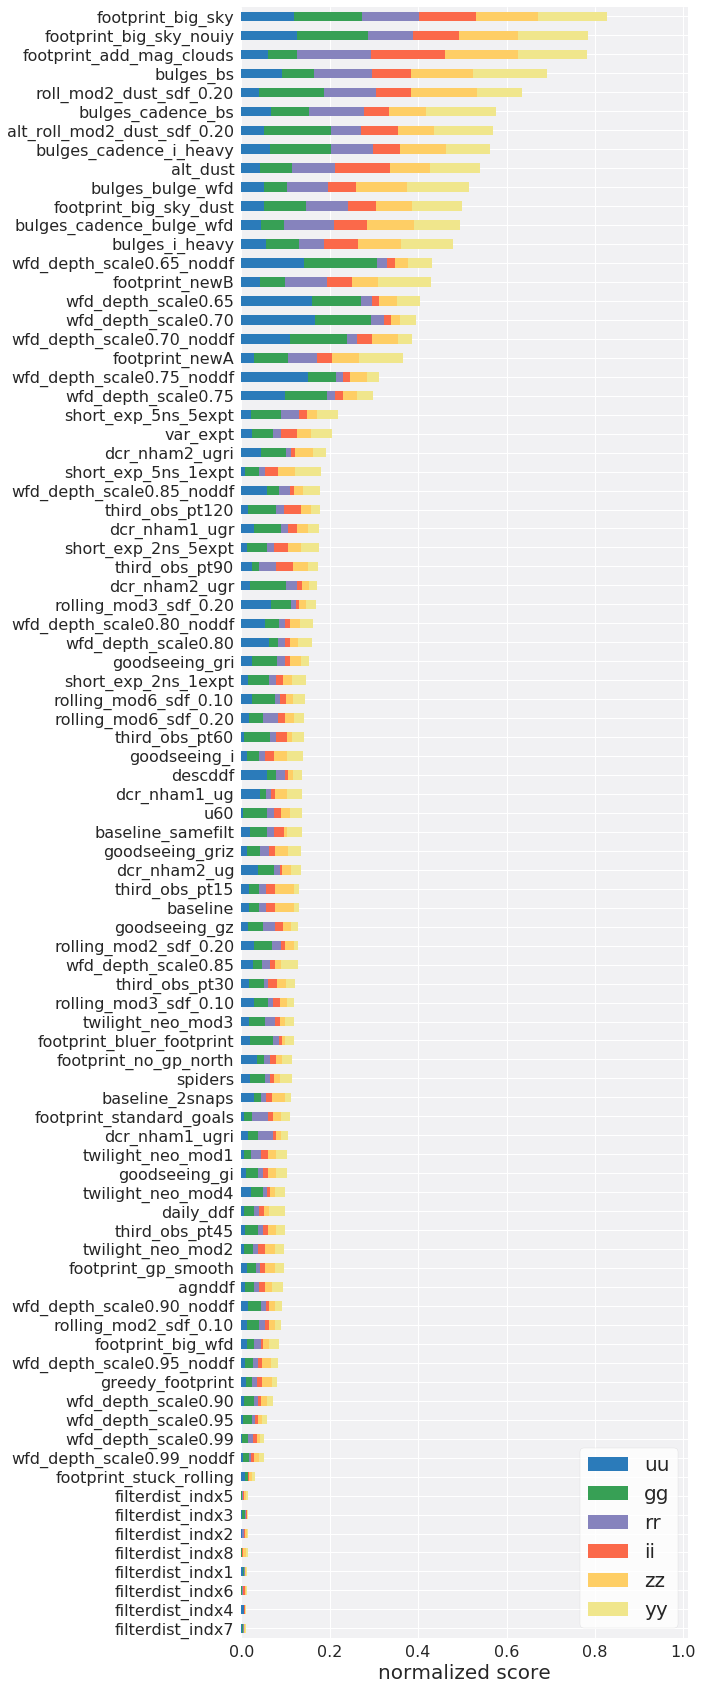

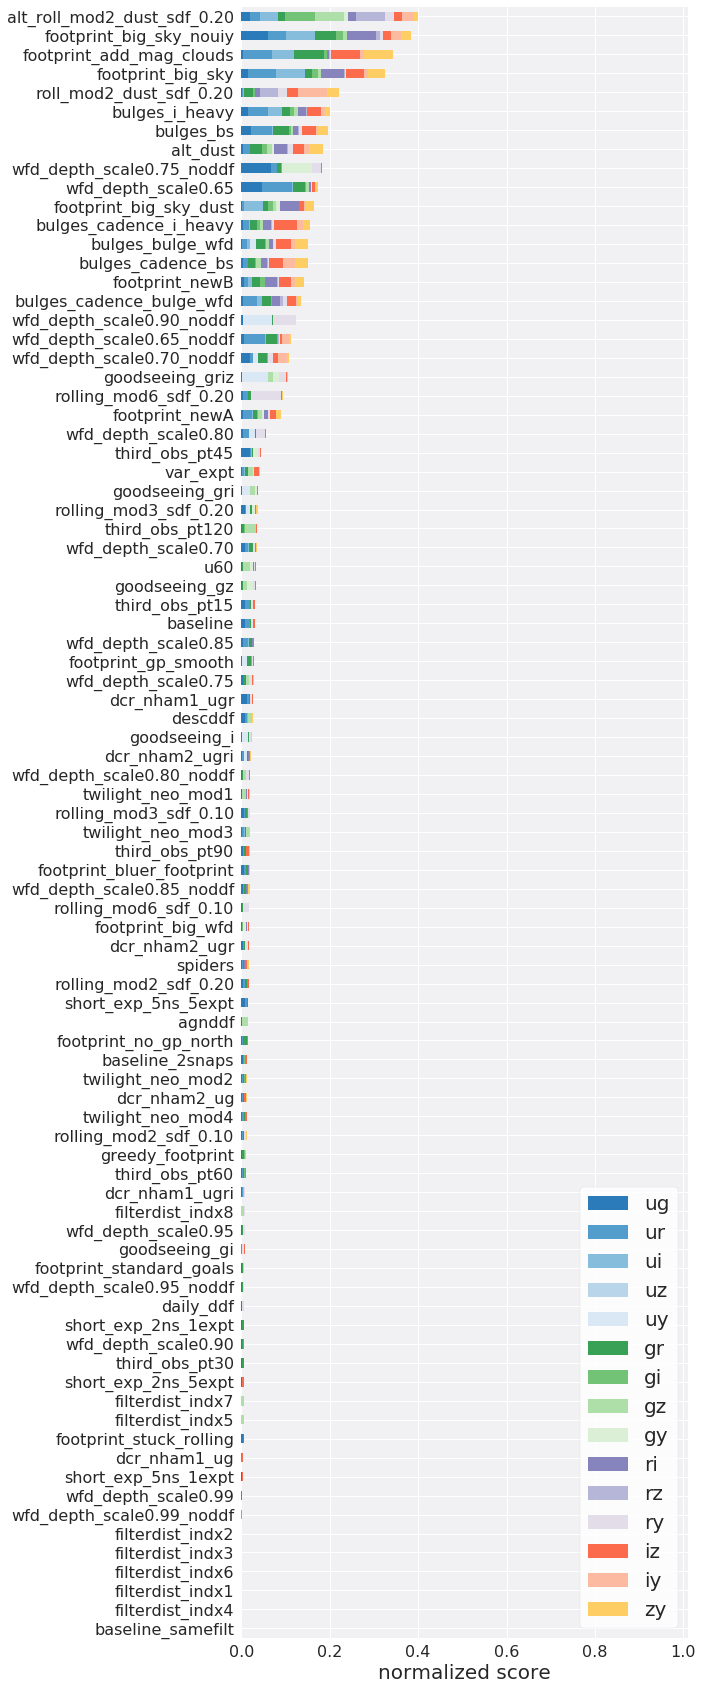

In [26]:
fomcsv = './data/df_tgapsFoM_LMC_inwfd.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False, savefig='figures/barh_tgapsLMC_same.pdf', cmap=get_mycmap(pairs='same') )
plot_barh(df_norm, cols_diff, byfamily=False, savefig='figures/barh_tgapsLMC_diff.pdf', cmap=get_mycmap(pairs='diff') )


### time gaps SMC

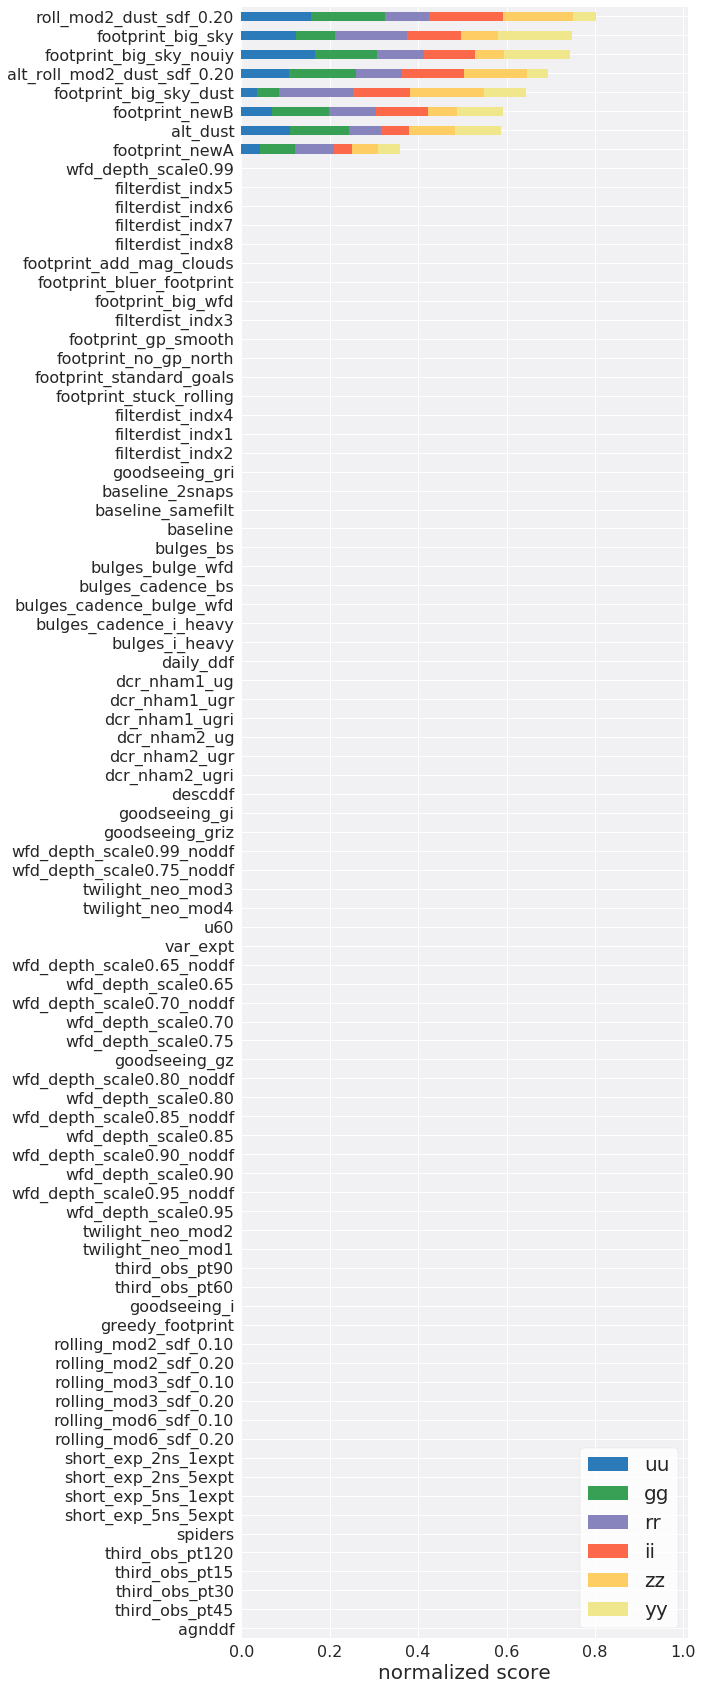

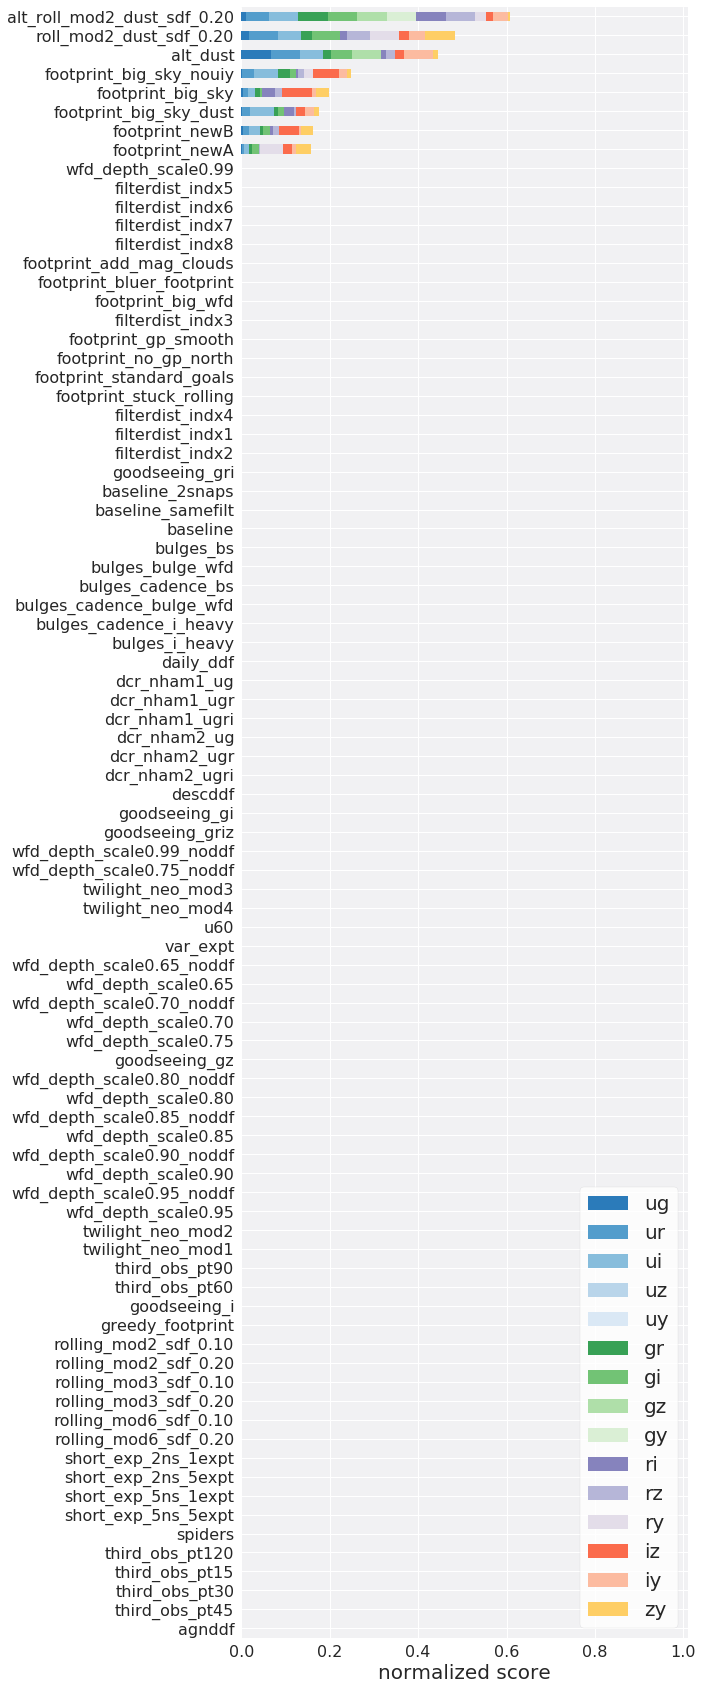

In [27]:
fomcsv = 'data/df_tgapsFoM_SMC_inwfd.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False, savefig='figures/barh_tgapsSMC_same.pdf', cmap=get_mycmap(pairs='same') )
plot_barh(df_norm, cols_diff, byfamily=False, savefig='figures/barh_tgapSMC_diff.pdf', cmap=get_mycmap(pairs='diff') )



### Nfields GP

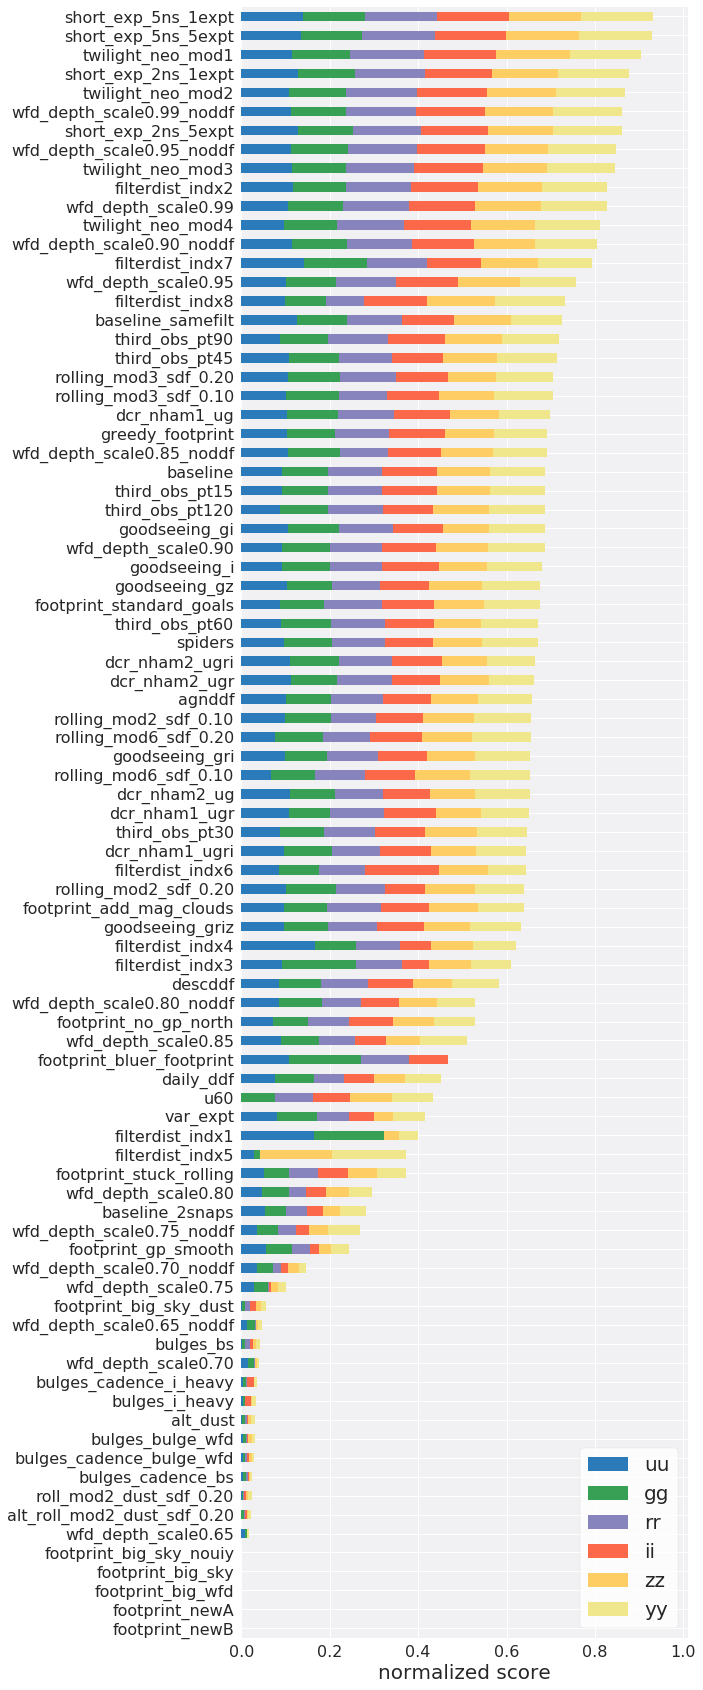

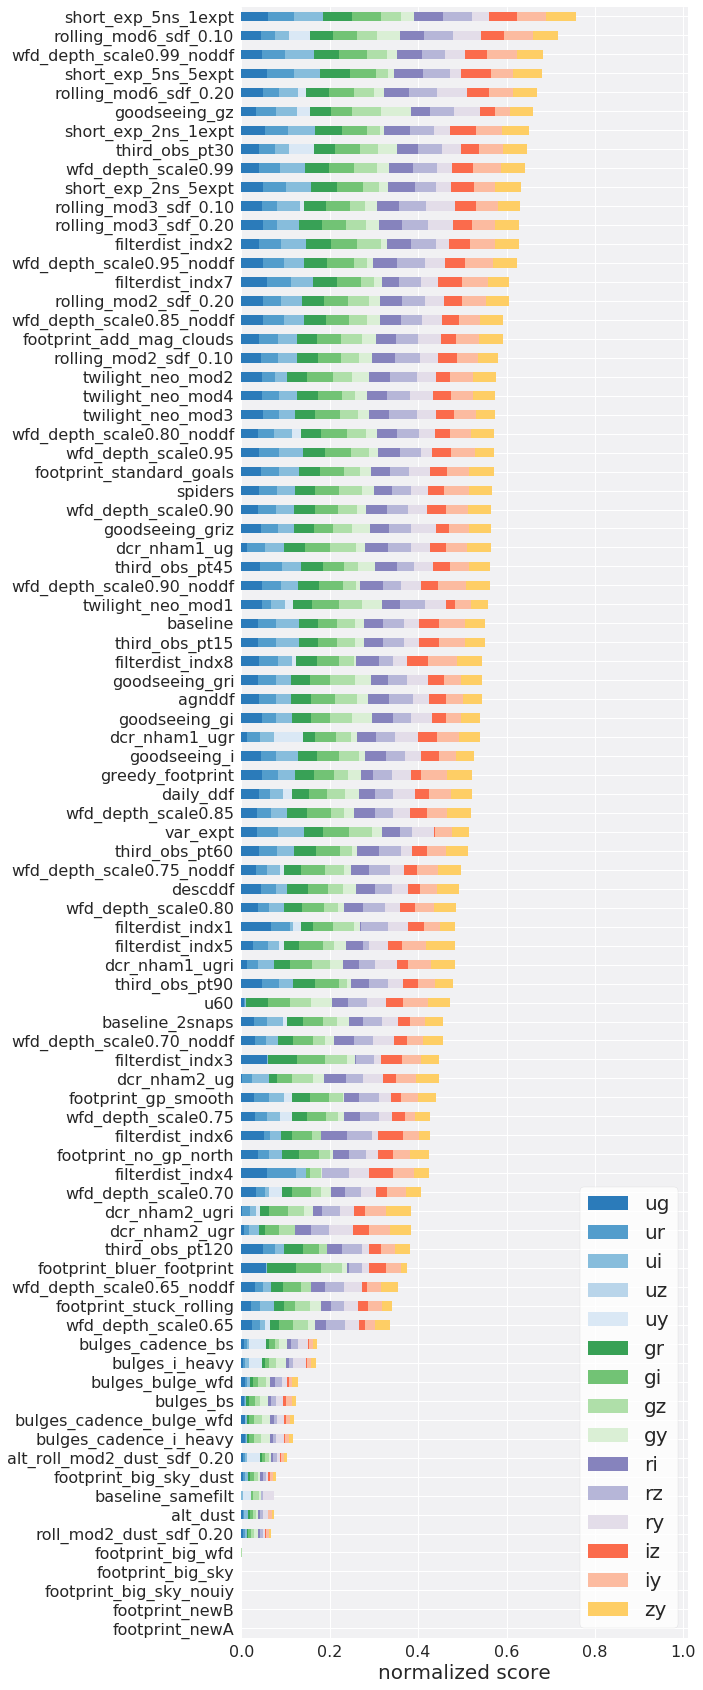

In [28]:
fomcsv = 'data/df_Nfields_GP_inwfd.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False, savefig='figures/barh_Nfields_GP_same.pdf', cmap=get_mycmap(pairs='same') )
plot_barh(df_norm, cols_diff, byfamily=False, savefig='figures/barh_Nfields_GP_diff.pdf', cmap=get_mycmap(pairs='diff') )


### Nfields LMC

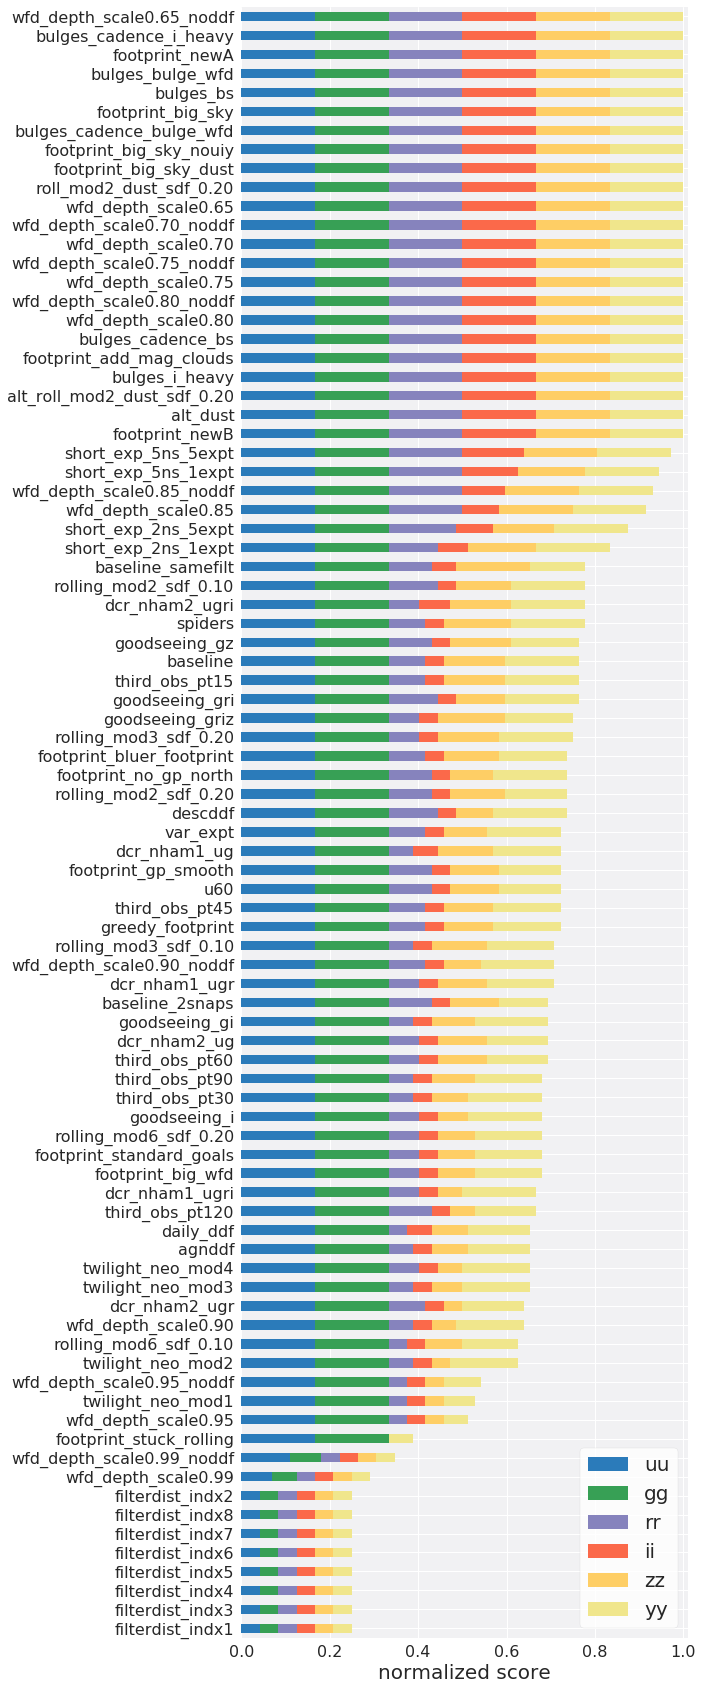

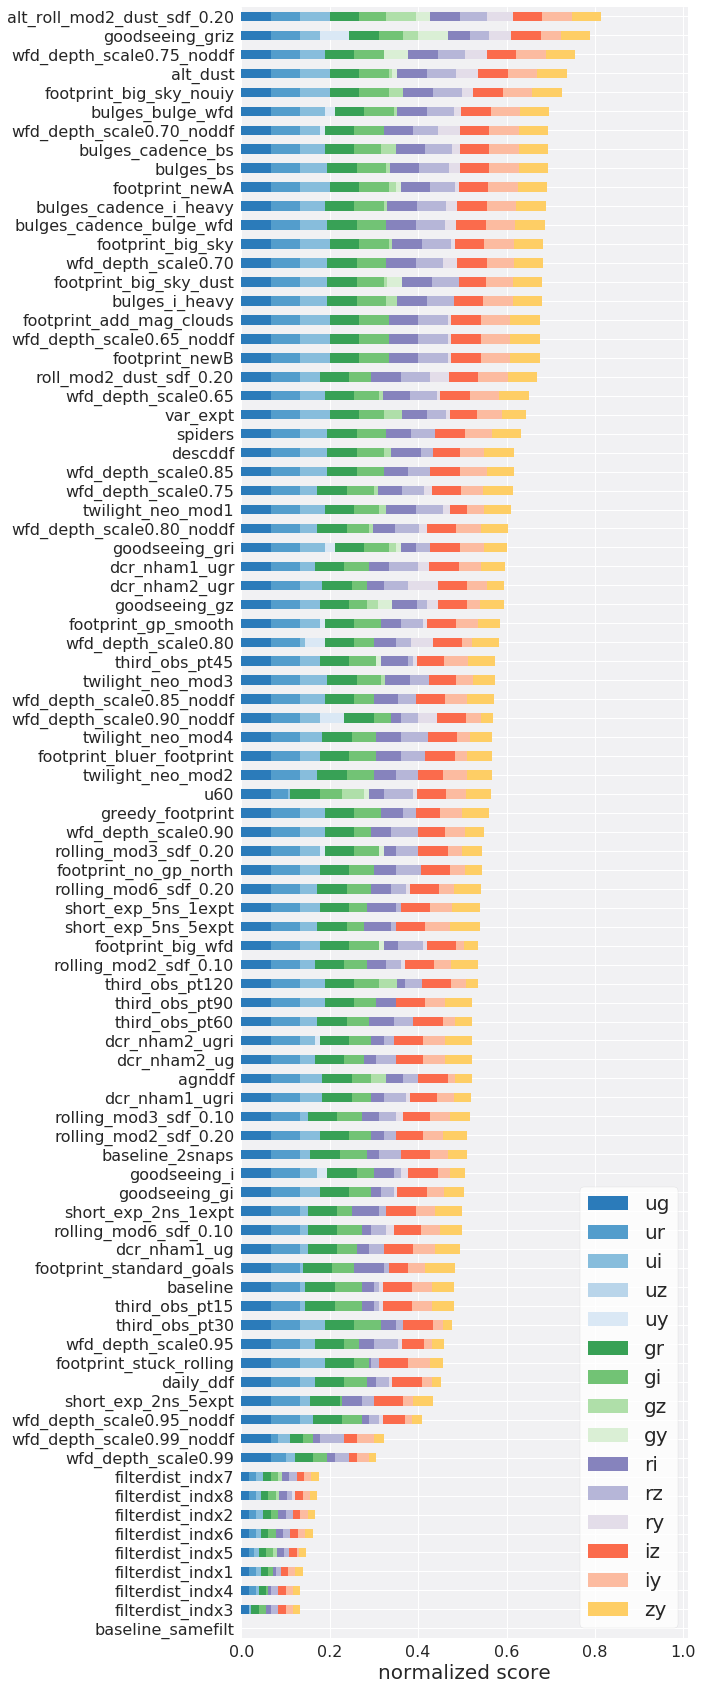

In [29]:
fomcsv = 'data/df_Nfields_LMC_inwfd.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False, savefig='figures/barh_Nfields_LMC_same.pdf', cmap=get_mycmap(pairs='same') )
plot_barh(df_norm, cols_diff, byfamily=False, savefig='figures/barh_Nfields_LMC_diff.pdf', cmap=get_mycmap(pairs='diff') )


### Nfields SMC

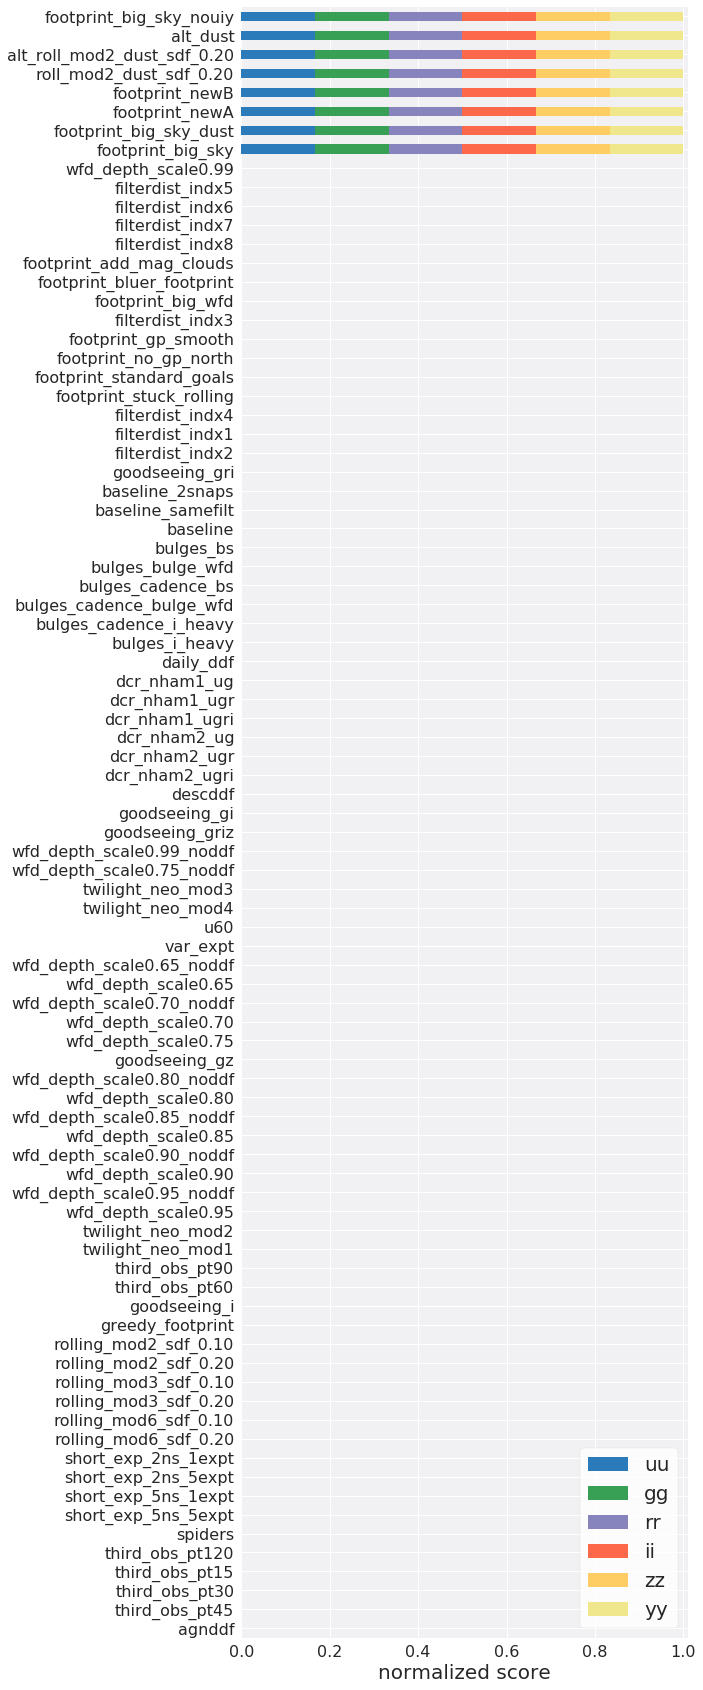

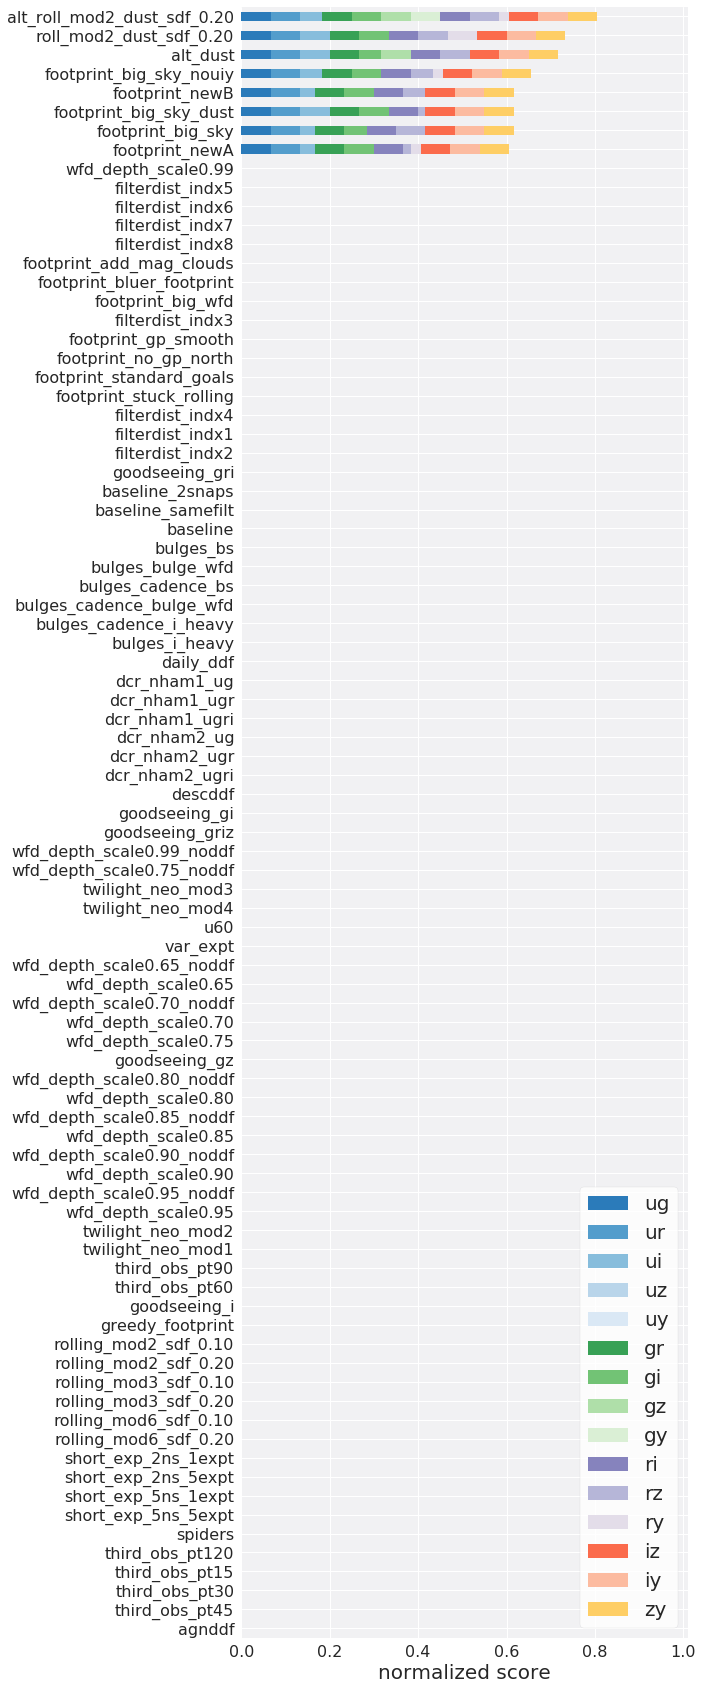

In [30]:
fomcsv = 'data/df_Nfields_SMC_inwfd.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False, savefig='figures/barh_Nfields_SMC_same.pdf', cmap=get_mycmap(pairs='same') )
plot_barh(df_norm, cols_diff, byfamily=False, savefig='figures/barh_Nfields_SMC_diff.pdf', cmap=get_mycmap(pairs='diff') )



### Nstars GP

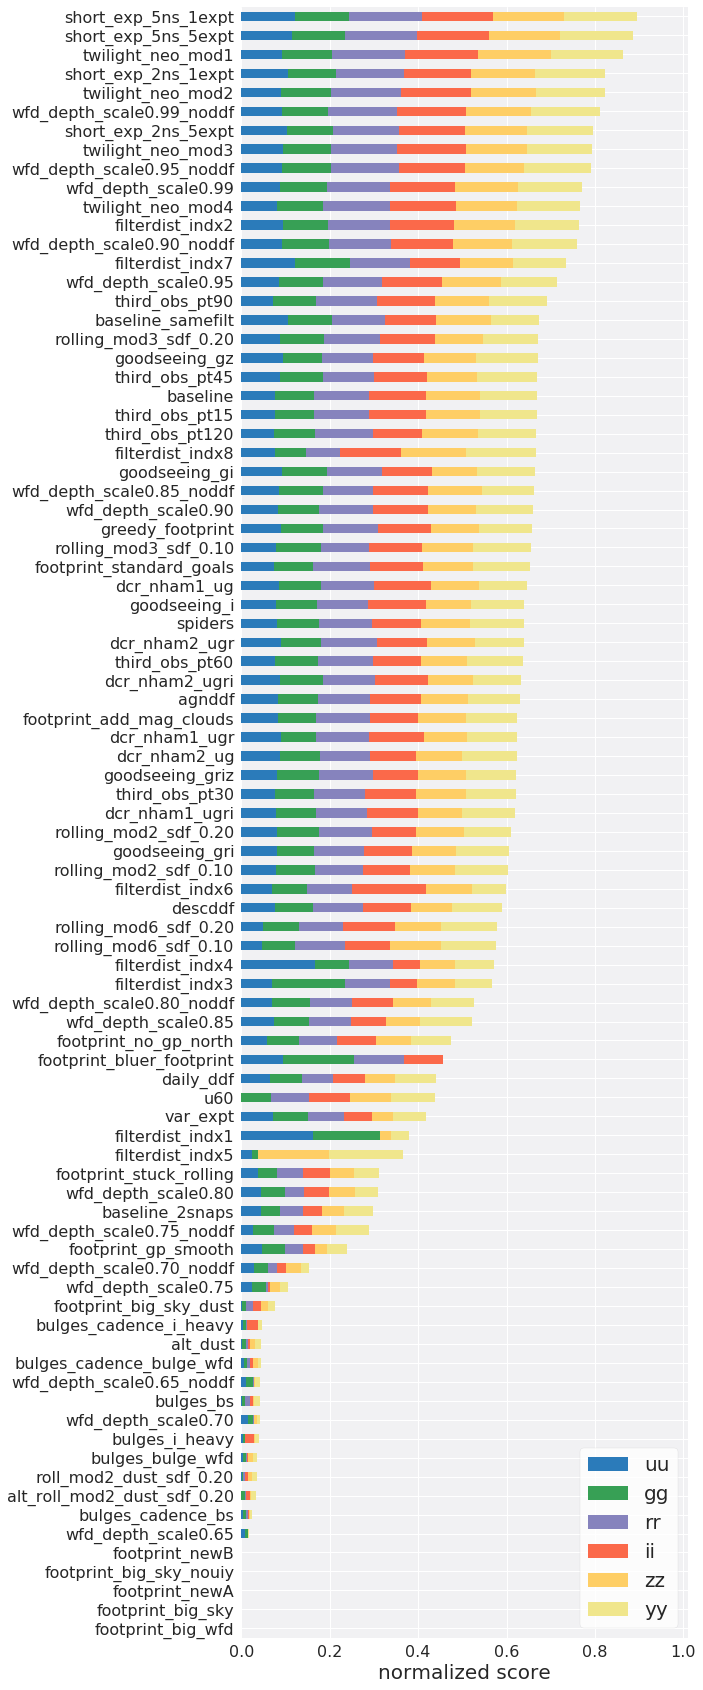

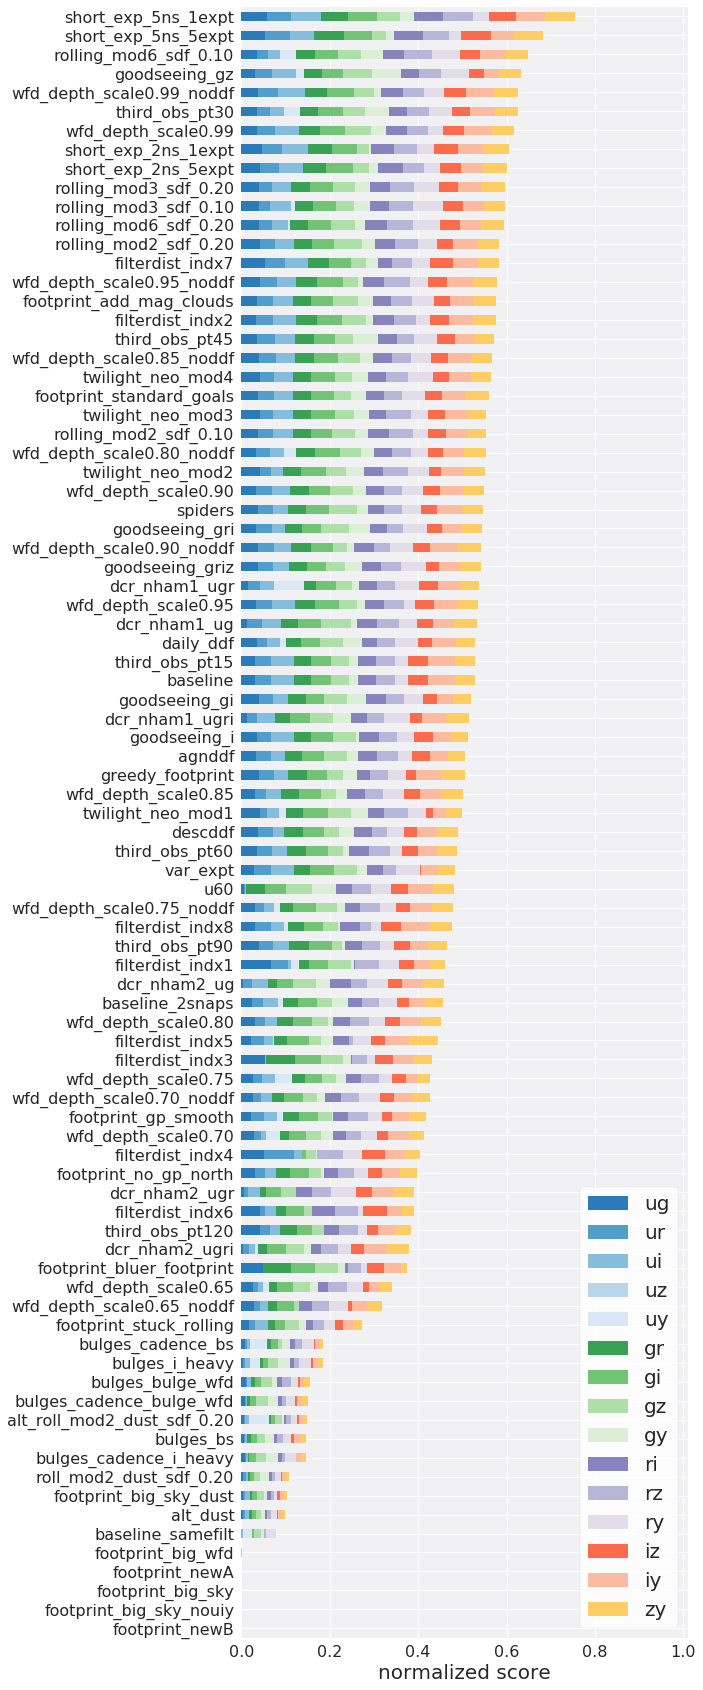

In [35]:
fomcsv = 'data/df_Nstar_GP_inwfd.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False, savefig='figures/barh_Nstars_GP_same.pdf', cmap=get_mycmap(pairs='same') )
plot_barh(df_norm, cols_diff, byfamily=False, savefig='figures/barh_Nstarss_GP_diff.pdf', cmap=get_mycmap(pairs='diff') )



### Nstars LMC

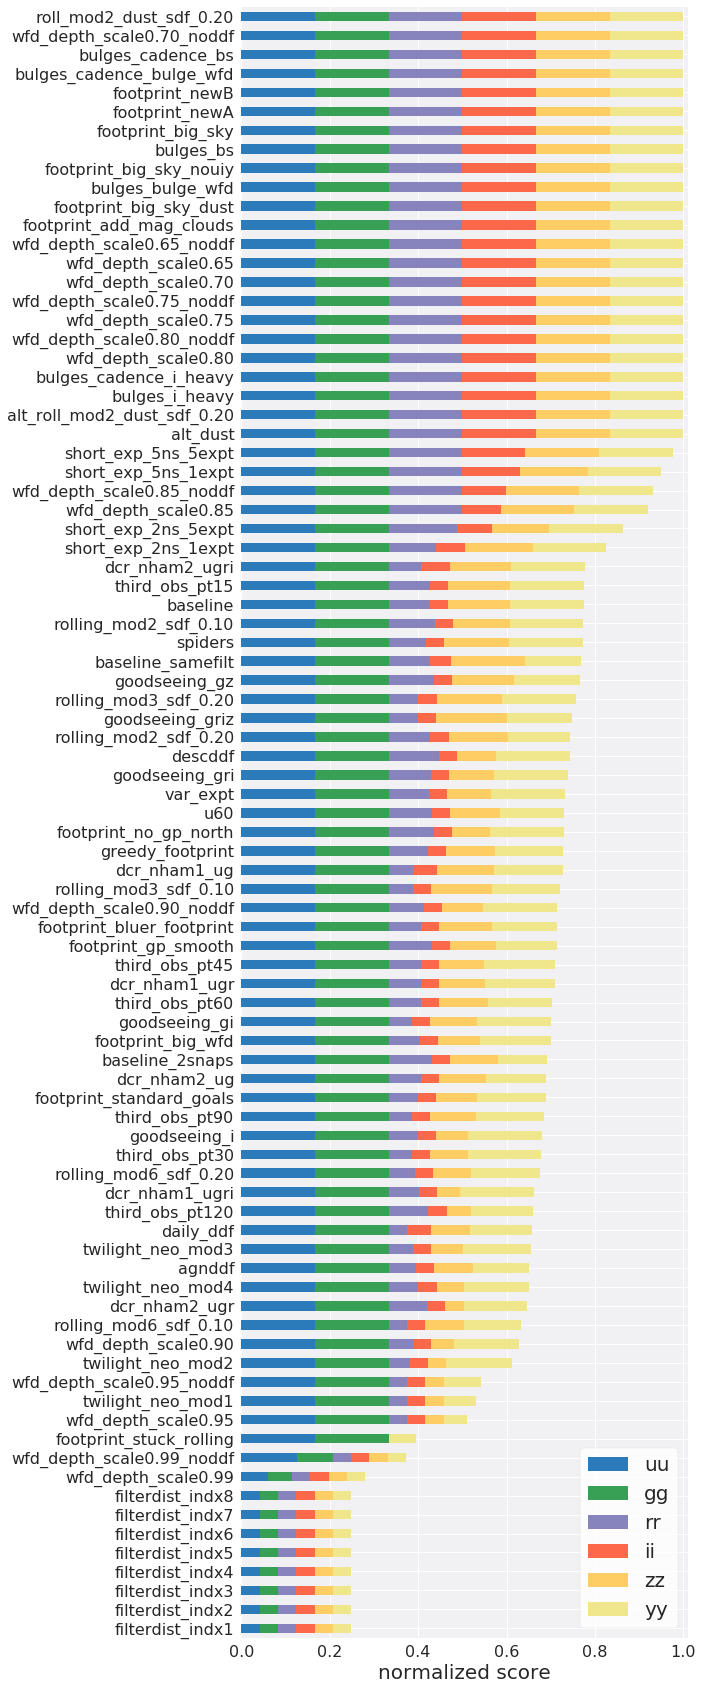

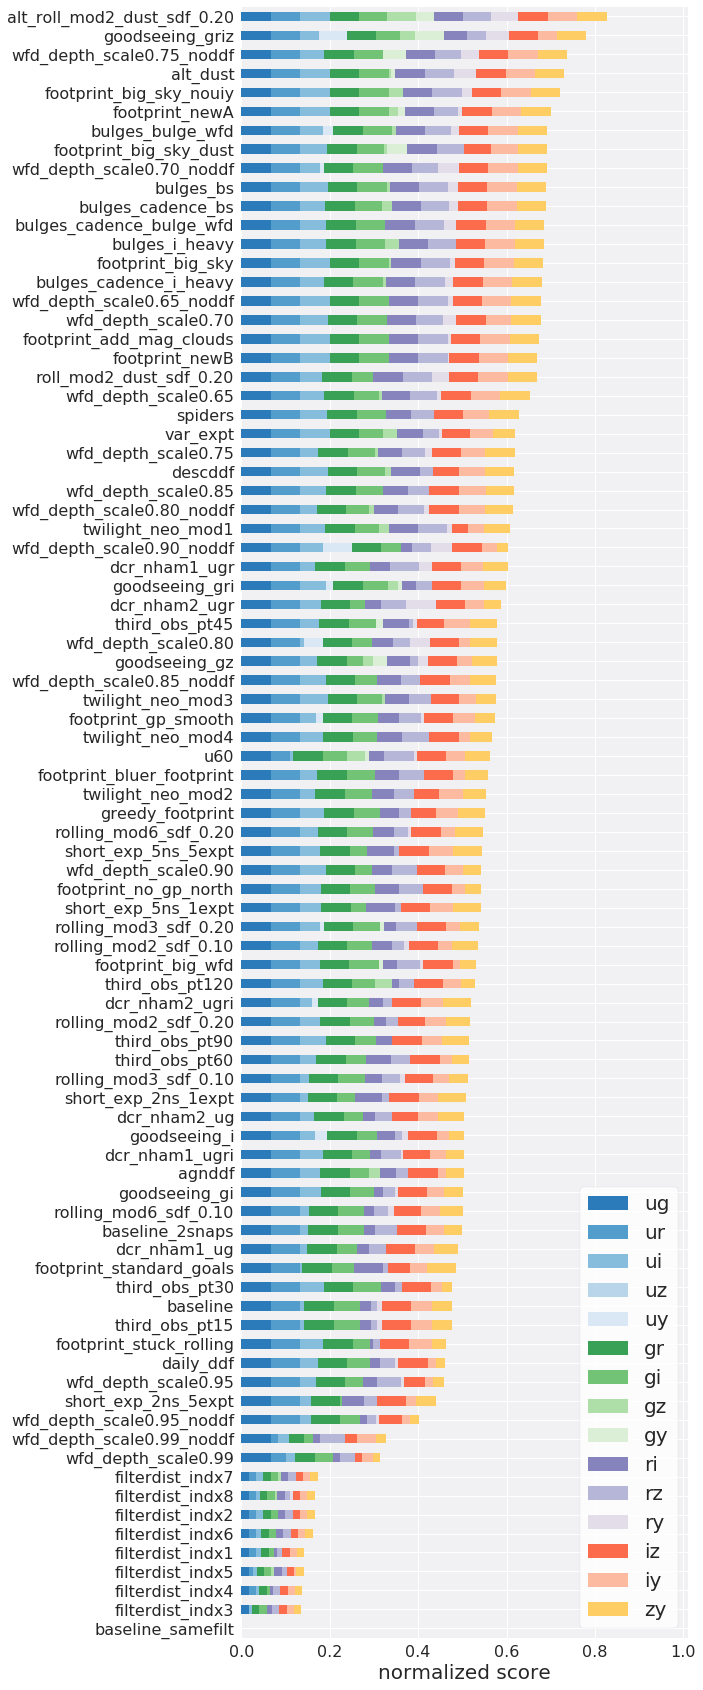

In [36]:
fomcsv = './data/df_Nstar_LMC_inwfd.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False, savefig='figures/barh_Nstars_LMC_same.pdf', cmap=get_mycmap(pairs='same') )
plot_barh(df_norm, cols_diff, byfamily=False, savefig='figures/barh_Nstarss_LMC_diff.pdf', cmap=get_mycmap(pairs='diff') )




### Nstars SMC

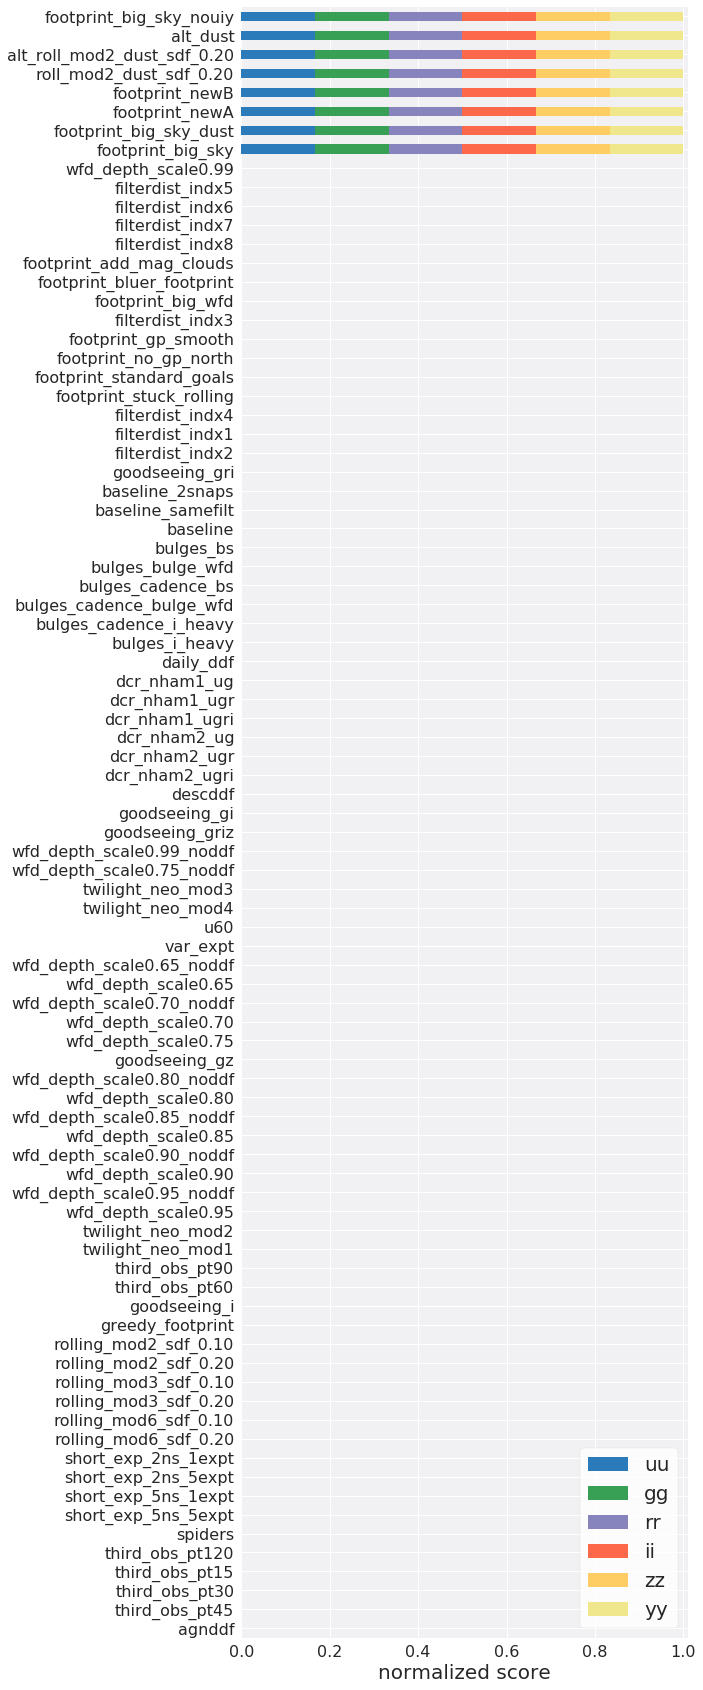

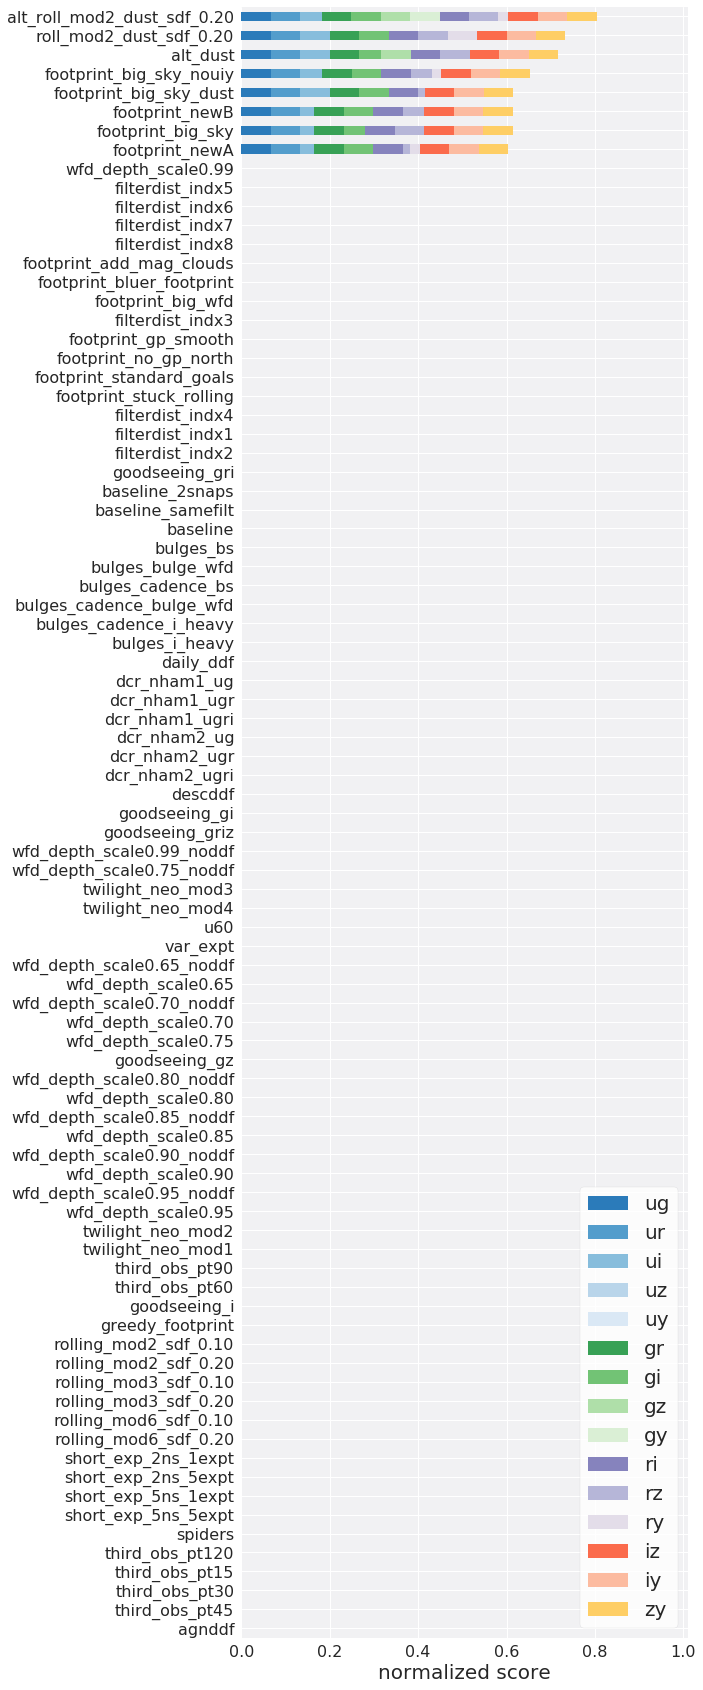

In [37]:
fomcsv = './data/df_Nstar_SMC_inwfd.csv'
df_norm = get_df_norm(fomcsv)
plot_barh(df_norm, cols_same, byfamily=False, savefig='figures/barh_Nstars_SMC_same.pdf', cmap=get_mycmap(pairs='same') )
plot_barh(df_norm, cols_diff, byfamily=False, savefig='figures/barh_Nstarss_SMC_diff.pdf', cmap=get_mycmap(pairs='diff') )

